<a href="https://colab.research.google.com/github/anjuunni/Sample/blob/main/Timeseries_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import files
uploaded = files.upload()

Saving daily-total-female-births-CA.csv to daily-total-female-births-CA (2).csv


In [4]:
f_birth=pd.read_csv("daily-total-female-births-CA.csv",index_col=[0],parse_dates=[0])

In [5]:
f_birth.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [6]:
type(f_birth)

pandas.core.frame.DataFrame

In [7]:
series_value=f_birth.values

In [8]:
type(series_value)

numpy.ndarray

In [9]:
f_birth.size

365

In [10]:
f_birth.tail()

,births
date,
1959-12-27,37
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50


In [11]:
f_birth.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


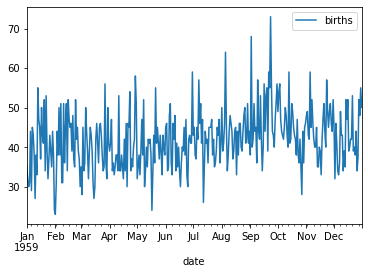

In [12]:
f_birth.plot()

In [13]:
f_birth_mean=f_birth.rolling(window=30).mean()

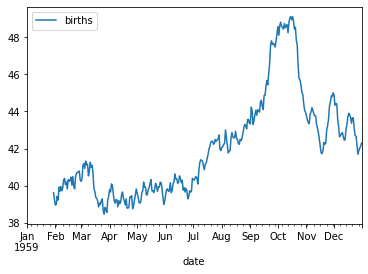

In [14]:
f_birth_mean.plot()

In [15]:
value=pd.DataFrame(series_value)

In [16]:
birth_df=pd.concat([value,value.shift(1)],axis=1)

In [17]:
birth_df.head()

,0,0
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0


In [18]:
birth_df.columns=['Actual_birth','Forecast_birth']

In [19]:
birth_test=birth_df[1:]

In [20]:
birth_test.head()

,Actual_birth,Forecast_birth
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0
5,29,44.0


In [21]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [22]:
birth_error=mean_squared_error(birth_test.Actual_birth,birth_test.Forecast_birth)

In [23]:
birth_error

84.22252747252747

In [24]:
np.sqrt(birth_error)

9.177283229394606

In [25]:
#ARIMA-Autoregressive(p) Integrated(d) Moving Average(q)

In [26]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [27]:
#plot_pacf is to identify parameter q
#ARIMA(p,d,q)

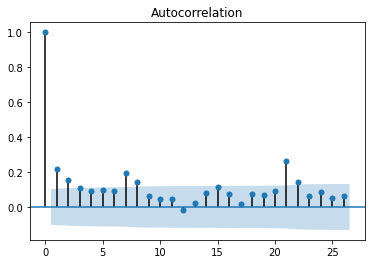

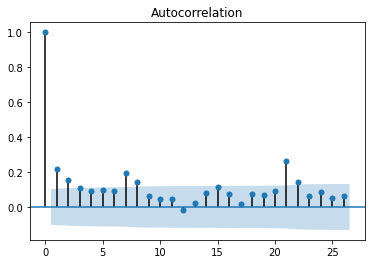

In [28]:
plot_acf(f_birth)

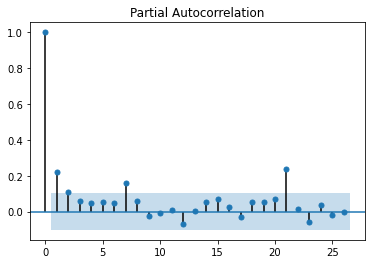

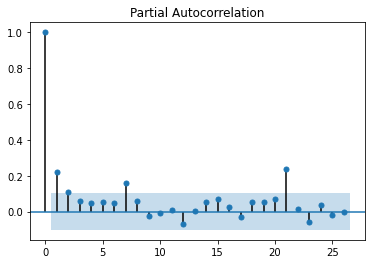

In [29]:
plot_pacf(f_birth)#to identify the value of p

In [30]:
#p=2,3 d=0,q=3,4

In [31]:
birth_train=f_birth[0:330]
birth_test=f_birth[330:365]

In [32]:
birth_train.size

330

In [33]:
birth_test.size

35

In [34]:
from statsmodels.tsa.arima_model import ARIMA

In [35]:
birth_model=ARIMA(birth_train,order=(2,1,3))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [36]:
birth_model_fit=birth_model.fit()

In [37]:
birth_model_fit.aic

2230.9482523572665

In [38]:
birth_forecast=birth_model_fit.forecast(steps=35)[0]

In [39]:
birth_forecast

array([45.30369833, 46.3106401 , 43.64945872, 44.59219668, 46.49706372,
       44.34348086, 44.08984412, 46.34390382, 45.07535206, 43.88105961,
       45.9521466 , 45.69576995, 43.97398079, 45.45674188, 46.10377395,
       44.31134533, 44.99233795, 46.26018937, 44.79345871, 44.66474437,
       46.18573149, 45.30637415, 44.5332346 , 45.94670787, 45.74844039,
       44.60565402, 45.63340441, 46.04985077, 44.84525522, 45.33695327,
       46.18219996, 45.1858708 , 45.12984484, 46.15767119, 45.55082443])

In [40]:
np.sqrt(mean_squared_error(birth_test,birth_forecast))

6.859975697276732

In [41]:
#Normalization
#1.If your data is on different scales
#2.Because some algorithms works better when data is normalized

In [42]:
#normalization=(x-min)/(max-min)

In [43]:
f_birth.min()

births    23
dtype: int64

In [44]:
f_birth.max()

births    73
dtype: int64

In [45]:
(37-23)/(73-23)

0.28

In [46]:
(55-23)/(73-23)

0.64

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
birth_arr=f_birth.values

In [49]:
birth_arr

array([[35],
       [32],
       [30],
       [31],
       [44],
       [29],
       [45],
       [43],
       [38],
       [27],
       [38],
       [33],
       [55],
       [47],
       [45],
       [37],
       [50],
       [43],
       [41],
       [52],
       [34],
       [53],
       [39],
       [32],
       [37],
       [43],
       [39],
       [35],
       [44],
       [38],
       [24],
       [23],
       [31],
       [44],
       [38],
       [50],
       [38],
       [51],
       [31],
       [31],
       [51],
       [36],
       [45],
       [51],
       [34],
       [52],
       [47],
       [45],
       [46],
       [39],
       [48],
       [37],
       [35],
       [52],
       [42],
       [45],
       [39],
       [37],
       [30],
       [35],
       [28],
       [45],
       [34],
       [36],
       [50],
       [44],
       [39],
       [32],
       [39],
       [45],
       [43],
       [39],
       [31],
       [27],
       [30],
       [42],
       [46],

In [50]:
scaler=MinMaxScaler(feature_range=(0,1))

In [51]:
scaler=scaler.fit(birth_arr)

In [52]:
scaler.data_min_

array([23.])

In [53]:
scaler.data_max_

array([73.])

In [54]:
birth_normalize=scaler.transform(birth_arr)

In [55]:
birth_normalize[0]

array([0.24])

In [56]:
for i in range(5):
  print(birth_normalize[i])

[0.24]
[0.18]
[0.14]
[0.16]
[0.42]


In [57]:
birth_train=birth_normalize[0:330]
birth_test=birth_normalize[330:365]

In [58]:
birth_train.size

330

In [59]:
birth_test.size

35

In [60]:
birth_model=ARIMA(birth_train,order=(2,1,3))

In [61]:
birth_model_fit=birth_model.fit()

In [62]:
birth_model_fit.aic

-343.1628896136639

In [63]:
birth_forecast=birth_model_fit.forecast(steps=35)[0]

In [64]:
birth_forecast

array([0.44607351, 0.46621278, 0.41298824, 0.43184319, 0.4699413 ,
       0.42686889, 0.4217959 , 0.46687801, 0.44150658, 0.41762008,
       0.45904267, 0.45391517, 0.41947851, 0.4491343 , 0.4620754 ,
       0.42622593, 0.43984595, 0.46520373, 0.43586841, 0.43329386,
       0.46371447, 0.44612696, 0.43066356, 0.4589338 , 0.45496849,
       0.43211196, 0.45266748, 0.46099682, 0.43690411, 0.44673822,
       0.46364382, 0.44371661, 0.44259586, 0.46315314, 0.45101589])

In [65]:
birth_test

array([[0.56],
       [0.46],
       [0.42],
       [0.58],
       [0.44],
       [0.18],
       [0.46],
       [0.36],
       [0.22],
       [0.2 ],
       [0.26],
       [0.52],
       [0.4 ],
       [0.4 ],
       [0.22],
       [0.32],
       [0.24],
       [0.58],
       [0.48],
       [0.58],
       [0.32],
       [0.34],
       [0.38],
       [0.38],
       [0.6 ],
       [0.32],
       [0.34],
       [0.3 ],
       [0.42],
       [0.22],
       [0.28],
       [0.58],
       [0.5 ],
       [0.64],
       [0.54]])

In [66]:
np.sqrt(mean_squared_error(birth_test,birth_forecast))

0.13719934348894777

In [67]:
birth_forecast_reshape=birth_forecast.reshape(len(birth_forecast),1)

In [68]:
birth_forecast_reverse=scaler.inverse_transform(birth_forecast_reshape)

In [69]:
birth_forecast_reverse

array([[45.30367537],
       [46.31063877],
       [43.649412  ],
       [44.59215949],
       [46.49706496],
       [44.34344474],
       [44.0897951 ],
       [46.34390071],
       [45.07532884],
       [43.88100406],
       [45.95213326],
       [45.69575841],
       [43.97392537],
       [45.45671493],
       [46.10376983],
       [44.31129632],
       [44.99229731],
       [46.26018655],
       [44.79342039],
       [44.66469309],
       [46.18572364],
       [45.30634788],
       [44.53317795],
       [45.94669001],
       [45.74842445],
       [44.60559807],
       [45.63337403],
       [46.04984097],
       [44.84520533],
       [45.33691076],
       [46.1821908 ],
       [45.18583041],
       [45.12979317],
       [46.15765723],
       [45.55079439]])

In [70]:
birth_test_reshape=birth_test.reshape(len(birth_test),1)

In [71]:
birth_test_reverse=scaler.inverse_transform(birth_test_reshape)

In [72]:
np.sqrt(mean_squared_error(birth_test_reverse,birth_forecast_reverse))

6.859967174447386

In [73]:
#standardization
#=x-mean/std

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
std_scaler=StandardScaler()

In [76]:
std_scaler=std_scaler.fit(birth_arr)

In [77]:
std_scaler.mean_

array([41.98082192])

In [78]:
std_scaler.var_

array([53.84894727])

In [79]:
std_birth=std_scaler.transform(birth_arr)

In [80]:
std_birth[0]

array([-0.95130099])

In [81]:
std_birth[5]

array([-1.76894196])

In [82]:
std_birth_train=std_birth[0:330]
std_birth_test=std_birth[330:365]

In [83]:
std_birth_arima=ARIMA(std_birth_train,order=(2,1,3))

In [84]:
std_birth_arima_fit=std_birth_arima.fit()

In [85]:
std_birth_arima_fit.aic

919.494087909759

In [86]:
std_birth_forecast=std_birth_arima_fit.forecast(steps=35)[0]

In [87]:
std_birth_forecast

array([0.45283951, 0.59007459, 0.22738248, 0.35586729, 0.61548008,
       0.32197096, 0.2874015 , 0.59460342, 0.42171662, 0.2589471 ,
       0.54120901, 0.50627096, 0.27161226, 0.47368979, 0.56187452,
       0.3175918 , 0.41039706, 0.58318904, 0.38329777, 0.36575114,
       0.57303867, 0.45320025, 0.34782963, 0.54046106, 0.51344561,
       0.35770089, 0.49776147, 0.55452063, 0.39035596, 0.45735996,
       0.57255483, 0.43677662, 0.42913559, 0.56920938, 0.48651284])

In [88]:
std_birth_test

array([[ 1.22907491],
       [ 0.54770744],
       [ 0.27516045],
       [ 1.3653484 ],
       [ 0.41143395],
       [-1.36012148],
       [ 0.54770744],
       [-0.13366003],
       [-1.08757449],
       [-1.22384798],
       [-0.8150275 ],
       [ 0.95652792],
       [ 0.13888696],
       [ 0.13888696],
       [-1.08757449],
       [-0.40620702],
       [-0.95130099],
       [ 1.3653484 ],
       [ 0.68398093],
       [ 1.3653484 ],
       [-0.40620702],
       [-0.26993352],
       [ 0.00261346],
       [ 0.00261346],
       [ 1.5016219 ],
       [-0.40620702],
       [-0.26993352],
       [-0.54248051],
       [ 0.27516045],
       [-1.08757449],
       [-0.67875401],
       [ 1.3653484 ],
       [ 0.82025443],
       [ 1.77416889],
       [ 1.09280142]])

In [89]:
std_birth_forecast_reshape=std_birth_forecast.reshape(len(std_birth_forecast),1)

In [90]:
std_birth_forecast_reverse=std_scaler.inverse_transform(std_birth_forecast_reshape)

In [91]:
std_birth_forecast_reverse

array([[45.30384166],
       [46.31089791],
       [43.64939643],
       [44.59224164],
       [46.4973281 ],
       [44.34350409],
       [44.0898271 ],
       [46.3441313 ],
       [45.07545616],
       [43.88102343],
       [45.9523133 ],
       [45.69593144],
       [43.97396271],
       [45.45684486],
       [46.10396067],
       [44.31136907],
       [44.99239114],
       [46.26037054],
       [44.79353156],
       [44.66477119],
       [46.18588521],
       [45.30648886],
       [44.5332598 ],
       [45.94682475],
       [45.74858035],
       [44.60569695],
       [45.63348724],
       [46.04999643],
       [44.84532588],
       [45.33701358],
       [46.18233472],
       [45.18596924],
       [45.12989791],
       [46.15778523],
       [45.55094278]])

In [92]:
std_birth_test_reshape=std_birth_test.reshape(len(std_birth_test),1)

In [93]:
std_birth_test_reverse=std_scaler.inverse_transform(birth_test_reshape)

In [94]:
std_birth_test_reverse

array([[46.09020507],
       [45.35638665],
       [45.06285928],
       [46.23696875],
       [45.20962296],
       [43.30169507],
       [45.35638665],
       [44.62256823],
       [43.59522244],
       [43.44845876],
       [43.88874981],
       [45.7966777 ],
       [44.9160956 ],
       [44.9160956 ],
       [43.59522244],
       [44.32904086],
       [43.74198612],
       [46.23696875],
       [45.50315033],
       [46.23696875],
       [44.32904086],
       [44.47580454],
       [44.76933191],
       [44.76933191],
       [46.38373243],
       [44.32904086],
       [44.47580454],
       [44.18227718],
       [45.06285928],
       [43.59522244],
       [44.03551349],
       [46.23696875],
       [45.64991401],
       [46.6772598 ],
       [45.94344138]])

In [95]:
np.sqrt(mean_squared_error(std_birth_test_reverse,std_birth_forecast_reverse))

1.2256981150664508

In [96]:
f_birth['lag1']=f_birth['births'].shift(1)

In [97]:
f_birth.head()

,births,lag1
date,,
1959-01-01,35,NaN
1959-01-02,32,35.0
1959-01-03,30,32.0
1959-01-04,31,30.0
1959-01-05,44,31.0


In [98]:
f_birth['lag2']=f_birth['births'].shift(2)

In [99]:
f_birth['lag3']=f_birth['births'].shift(3)

In [100]:
f_birth.head()

,births,lag1,lag2,lag3
date,,,,
1959-01-01,35,NaN,NaN,NaN
1959-01-02,32,35.0,NaN,NaN
1959-01-03,30,32.0,35.0,NaN
1959-01-04,31,30.0,32.0,35.0
1959-01-05,44,31.0,30.0,32.0


In [101]:
f_birth['MA3']=f_birth['births'].rolling(window=3).mean()

In [102]:
f_birth.head()

,births,lag1,lag2,lag3,MA3
date,,,,,
1959-01-01,35,NaN,NaN,NaN,NaN
1959-01-02,32,35.0,NaN,NaN,NaN
1959-01-03,30,32.0,35.0,NaN,32.333333
1959-01-04,31,30.0,32.0,35.0,31.000000
1959-01-05,44,31.0,30.0,32.0,35.000000


In [103]:
f_birth['MA4']=f_birth['births'].rolling(window=4).mean()

In [104]:
f_birth['MA5']=f_birth['births'].rolling(window=5).mean()

In [105]:
f_birth.head()

,births,lag1,lag2,lag3,MA3,MA4,MA5
date,,,,,,,
1959-01-01,35,NaN,NaN,NaN,NaN,NaN,NaN
1959-01-02,32,35.0,NaN,NaN,NaN,NaN,NaN
1959-01-03,30,32.0,35.0,NaN,32.333333,NaN,NaN
1959-01-04,31,30.0,32.0,35.0,31.000000,32.00,NaN
1959-01-05,44,31.0,30.0,32.0,35.000000,34.25,34.4


In [106]:
f_birth['MAX5']=f_birth['births'].rolling(window=5).max()

In [107]:
f_birth.head()

,births,lag1,lag2,lag3,MA3,MA4,MA5,MAX5
date,,,,,,,,
1959-01-01,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-01-02,32,35.0,NaN,NaN,NaN,NaN,NaN,NaN
1959-01-03,30,32.0,35.0,NaN,32.333333,NaN,NaN,NaN
1959-01-04,31,30.0,32.0,35.0,31.000000,32.00,NaN,NaN
1959-01-05,44,31.0,30.0,32.0,35.000000,34.25,34.4,44.0


In [108]:
f_birth['MIN5']=f_birth['births'].rolling(window=5).min()

In [109]:
f_birth.head()

,births,lag1,lag2,lag3,MA3,MA4,MA5,MAX5,MIN5
date,,,,,,,,,
1959-01-01,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-01-02,32,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-01-03,30,32.0,35.0,NaN,32.333333,NaN,NaN,NaN,NaN
1959-01-04,31,30.0,32.0,35.0,31.000000,32.00,NaN,NaN,NaN
1959-01-05,44,31.0,30.0,32.0,35.000000,34.25,34.4,44.0,30.0


In [110]:
f_birth['day']=f_birth.index.day

In [111]:
f_birth.head()

,births,lag1,lag2,lag3,MA3,MA4,MA5,MAX5,MIN5,day
date,,,,,,,,,,
1959-01-01,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1959-01-02,32,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1959-01-03,30,32.0,35.0,NaN,32.333333,NaN,NaN,NaN,NaN,3
1959-01-04,31,30.0,32.0,35.0,31.000000,32.00,NaN,NaN,NaN,4
1959-01-05,44,31.0,30.0,32.0,35.000000,34.25,34.4,44.0,30.0,5


In [112]:
f_birth['month']=f_birth.index.month

In [113]:
f_birth.head()

,births,lag1,lag2,lag3,MA3,MA4,MA5,MAX5,MIN5,day,month
date,,,,,,,,,,,
1959-01-01,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
1959-01-02,32,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1
1959-01-03,30,32.0,35.0,NaN,32.333333,NaN,NaN,NaN,NaN,3,1
1959-01-04,31,30.0,32.0,35.0,31.000000,32.00,NaN,NaN,NaN,4,1
1959-01-05,44,31.0,30.0,32.0,35.000000,34.25,34.4,44.0,30.0,5,1


In [114]:
f_birth['year']=f_birth.index.year

In [115]:
f_birth.head()

,births,lag1,lag2,lag3,MA3,MA4,MA5,MAX5,MIN5,day,month,year
date,,,,,,,,,,,,
1959-01-01,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1959
1959-01-02,32,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,1959
1959-01-03,30,32.0,35.0,NaN,32.333333,NaN,NaN,NaN,NaN,3,1,1959
1959-01-04,31,30.0,32.0,35.0,31.000000,32.00,NaN,NaN,NaN,4,1,1959
1959-01-05,44,31.0,30.0,32.0,35.000000,34.25,34.4,44.0,30.0,5,1,1959


In [116]:
f_birth.dropna()

,births,lag1,lag2,lag3,MA3,MA4,MA5,MAX5,MIN5,day,month,year
date,,,,,,,,,,,,
1959-01-05,44,31.0,30.0,32.0,35.000000,34.25,34.4,44.0,30.0,5,1,1959
1959-01-06,29,44.0,31.0,30.0,34.666667,33.50,33.2,44.0,29.0,6,1,1959
1959-01-07,45,29.0,44.0,31.0,39.333333,37.25,35.8,45.0,29.0,7,1,1959
1959-01-08,43,45.0,29.0,44.0,39.000000,40.25,38.4,45.0,29.0,8,1,1959
1959-01-09,38,43.0,45.0,29.0,42.000000,38.75,39.8,45.0,29.0,9,1,1959
...,...,...,...,...,...,...,...,...,...,...,...,...
1959-12-27,37,34.0,44.0,38.0,38.333333,38.25,38.6,44.0,34.0,27,12,1959
1959-12-28,52,37.0,34.0,44.0,41.000000,41.75,41.0,52.0,34.0,28,12,1959
1959-12-29,48,52.0,37.0,34.0,45.666667,42.75,43.0,52.0,34.0,29,12,1959


In [ ]:
f_birth=pd.read_csv("daily-total-female-births-CA.csv",index_col=[0],parse_dates=[0])

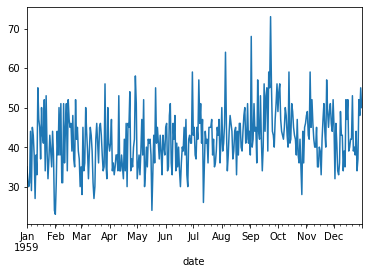

In [139]:
f_birth.plot()

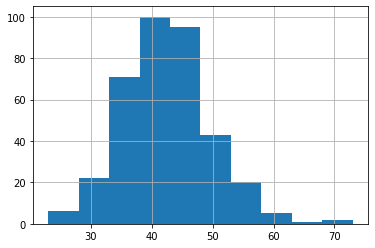

In [140]:
f_birth.hist()

In [119]:
f_birth_1=f_birth[0:201]
f_birth_2=f_birth[201:365]

In [120]:
f_birth_2.head()

,births,lag1,lag2,lag3,MA3,MA4,MA5,MAX5,MIN5,day,month,year
date,,,,,,,,,,,,
1959-07-21,47,45.0,45.0,45.0,45.666667,45.50,43.6,47.0,36.0,21,7,1959
1959-07-22,38,47.0,45.0,45.0,43.333333,43.75,44.0,47.0,38.0,22,7,1959
1959-07-23,42,38.0,47.0,45.0,42.333333,43.00,43.4,47.0,38.0,23,7,1959
1959-07-24,35,42.0,38.0,47.0,38.333333,40.50,41.4,47.0,35.0,24,7,1959
1959-07-25,36,35.0,42.0,38.0,37.666667,37.75,39.6,47.0,35.0,25,7,1959


In [121]:
f_birth_1.mean()

births      40.024876
lag1        40.000000
lag2        39.974874
lag3        39.949495
MA3         40.030151
MA4         40.039141
MA5         40.057868
MAX5        48.507614
MIN5        32.395939
day         15.094527
month        3.855721
year      1959.000000
dtype: float64

In [122]:
f_birth_2.mean()

births      44.378049
lag1        44.347561
lag2        44.286585
lag3        44.268293
MA3         44.337398
MA4         44.320122
MA5         44.290244
MAX5        52.329268
MIN5        37.506098
day         16.487805
month        9.798780
year      1959.000000
dtype: float64

In [123]:
f_birth_1.var()

births    49.314378
lag1      49.437186
lag2      49.559972
lag3      49.682715
MA3       18.687077
MA4       13.987356
MA5       10.813165
MAX5      26.292034
MIN5      15.240392
day       74.726020
month      3.744080
year       0.000000
dtype: float64

In [124]:
f_birth_2.var()

births    49.573994
lag1      49.381528
lag2      48.684236
lag3      48.602424
MA3       22.425341
MA4       18.292599
MA5       15.727266
MAX5      46.688463
MIN5      15.355791
day       80.496783
month      2.456195
year       0.000000
dtype: float64

In [125]:
from statsmodels.tsa.stattools import adfuller

In [126]:
f_birth=pd.read_csv("daily-total-female-births-CA.csv",index_col=[0],parse_dates=[0],squeeze=True)

In [127]:
birth_series=f_birth.values

In [128]:
adf_test=adfuller(f_birth)

In [129]:
adf_test[0]

-4.808291253559763

In [130]:
adf_test[1]

5.243412990149865e-05

In [131]:
#Automation of Testing

In [132]:
def adf_test(dataset):
  import pandas as pd
  import matplotlib.pyplot as plt
  %matplotlib inline
  ds=pd.read_csv(dataset,index_col=[0],parse_dates=[0],squeeze=True)
  print(ds.hist())
  ds_split=int(len(ds)/2)
  ds1=ds[0:ds_split]
  ds2=ds[ds_split:]
  print('Mean 1 -',ds1.mean())
  print('Mean 2 -',ds2.mean())
  print('Var 1 -',ds1.var())
  print('Var 2 -',ds2.var())
  from statsmodels.tsa.stattools import adfuller
  adf_test=adfuller(ds)
  print('ADfuller Statistics -',adf_test[0])
  print('P value -', adf_test[1])

AxesSubplot(0.125,0.125;0.775x0.755)
Mean 1 - 39.76373626373626
Mean 2 - 44.185792349726775
Var 1 - 49.48530751016939
Var 2 - 48.97628055005103
ADfuller Statistics - -4.808291253559763
P value - 5.243412990149865e-05


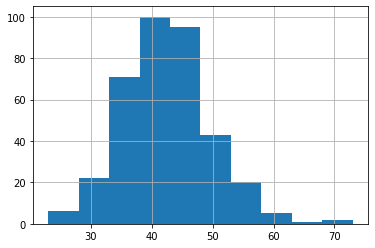

In [133]:
adf_test("daily-total-female-births-CA.csv")

In [134]:
#Hyperparameters Tuning

In [135]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [136]:
f_birth=pd.read_csv("daily-total-female-births-CA.csv",index_col=[0],parse_dates=[0],squeeze=True)

In [137]:
p_values=range(0,8)
d_values=range(0,3)
q_values=range(0,5)
               

In [138]:

for p in p_values:
  for d in d_values:
    for q in q_values:
      order=(p,d,q)
      train,test=f_birth[0:300],f_birth[300:365]
      predictions=list()
      for i in range(len(test)):
        try:
          model=ARIMA(train,order)
          model_fit=model.fit(disp=0)
          pred_y=model_fit.forecast()[0]
          predictions.append(pred_y)
          error=mean_squared_error(test,predictions)
          print('ARIMA%s , MSE= %.2f' % (order,error))
        except:
          continue  

ARIMA(0, 0, 1) , MSE= 56.52
ARIMA(0, 0, 2) , MSE= 63.85
ARIMA(0, 0, 3) , MSE= 62.33
ARIMA(0, 0, 4) , MSE= 64.77
ARIMA(0, 1, 1) , MSE= 40.91
ARIMA(0, 1, 2) , MSE= 39.78
ARIMA(0, 2, 1) , MSE= 290.02
ARIMA(1, 0, 0) , MSE= 62.74
ARIMA(1, 0, 1) , MSE= 47.07
ARIMA(1, 1, 0) , MSE= 193.00
ARIMA(1, 1, 1) , MSE= 39.71
ARIMA(1, 1, 2) , MSE= 42.80
ARIMA(1, 1, 3) , MSE= 40.24
ARIMA(1, 1, 4) , MSE= 39.71
ARIMA(1, 2, 0) , MSE= 552.28
ARIMA(2, 0, 0) , MSE= 67.29
ARIMA(2, 0, 1) , MSE= 46.64
ARIMA(2, 0, 2) , MSE= 43.86
ARIMA(2, 1, 0) , MSE= 127.64
ARIMA(2, 1, 1) , MSE= 40.29
ARIMA(2, 1, 2) , MSE= 41.56
ARIMA(2, 1, 3) , MSE= 40.16
ARIMA(2, 1, 4) , MSE= 40.20
ARIMA(2, 2, 0) , MSE= 310.84
ARIMA(3, 0, 0) , MSE= 65.34
ARIMA(3, 0, 1) , MSE= 46.55
ARIMA(3, 0, 2) , MSE= 46.68
ARIMA(3, 0, 3) , MSE= 58.07
ARIMA(3, 1, 0) , MSE= 126.27
ARIMA(3, 1, 1) , MSE= 40.33
ARIMA(3, 1, 2) , MSE= 41.55
ARIMA(3, 1, 3) , MSE= 40.96
ARIMA(3, 1, 4) , MSE= 49.68
ARIMA(3, 2, 0) , MSE= 257.87
ARIMA(4, 0, 0) , MSE= 67.76
ARIMA(4, 0, 1